# Netflix Content Analytics

## By Miriam Garcia - Last Updated January 2026

## Extensive EDA (Catalog and trends)






In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Netflix-ish theme colors
NETFLIX_RED = "#E50914"
RED_2 = "#B20710"
RED_3 = "#7A0C0C"
DARK_BG = "#141414"
DARK_GRAY = "#221F1F"
MID_GRAY = "#6D6D6D"
LIGHT_GRAY = "#B3B3B3"
WHITE = "#FFFFFF"

def set_netflix_theme():
    plt.rcParams["figure.facecolor"] = DARK_BG
    plt.rcParams["axes.facecolor"] = DARK_BG
    plt.rcParams["axes.edgecolor"] = MID_GRAY
    plt.rcParams["axes.labelcolor"] = LIGHT_GRAY
    plt.rcParams["xtick.color"] = LIGHT_GRAY
    plt.rcParams["ytick.color"] = LIGHT_GRAY
    plt.rcParams["text.color"] = LIGHT_GRAY
    plt.rcParams["grid.color"] = "#2A2A2A"
    plt.rcParams["axes.titleweight"] = "bold"

set_netflix_theme()

# Load data (local path for now)
df = pd.read_csv(r"/cleaned_netflix_data.csv")

# Small cleanup just in case
# note: 'duration' is already numeric in your cleaned file
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")
df["year_added"] = pd.to_numeric(df.get("year_added"), errors="coerce")
df["month_added"] = pd.to_numeric(df.get("month_added"), errors="coerce")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,60.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,30.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,NaN
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,30.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,NaN
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,60.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,NaN


In [61]:
# Quick shape + nulls
print("Rows:", len(df))
print("Columns:", df.shape[1])

df.isna().mean().sort_values(ascending=False).head(12)


Rows: 8721
Columns: 15


duration_num    1.000000
date_added      0.011008
month_added     0.011008
year_added      0.011008
show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
release_year    0.000000
rating          0.000000
dtype: float64

/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_49741/3801749013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="type", palette=[NETFLIX_RED, MID_GRAY])


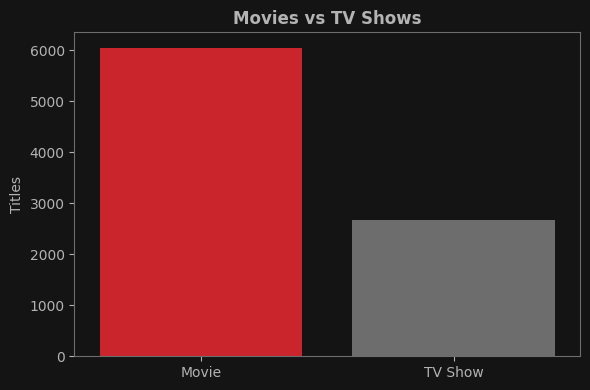

In [62]:
# Content type mix
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="type", palette=[NETFLIX_RED, MID_GRAY])
ax.set_title("Movies vs TV Shows")
ax.set_xlabel("")
ax.set_ylabel("Titles")
plt.tight_layout()
plt.show()


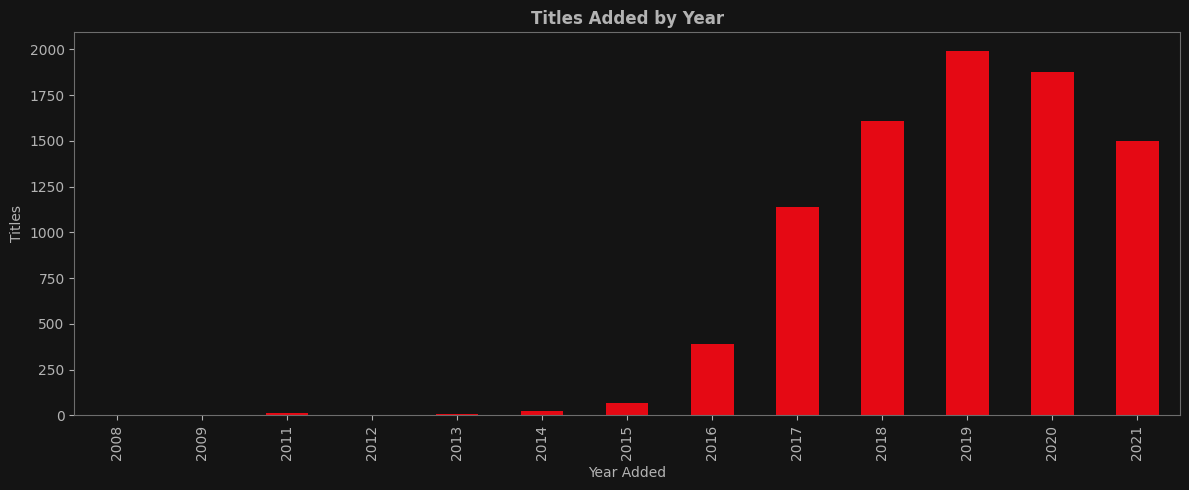

In [63]:
# Titles added to Netflix by year (based on date_added)
year_counts = df["year_added"].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12,5))
year_counts.plot(kind="bar", color=NETFLIX_RED)
plt.title("Titles Added by Year")
plt.xlabel("Year Added")
plt.ylabel("Titles")
plt.tight_layout()
plt.show()


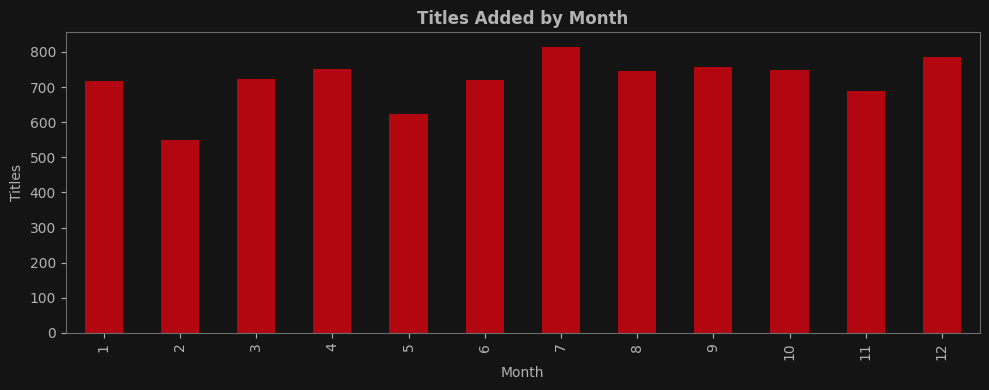

In [64]:
# Titles added by month (seasonality)
# small typo on purpose: montly
monthly = df.dropna(subset=["month_added"]).groupby("month_added").size().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,4))
monthly.plot(kind="bar", color=RED_2)
plt.title("Titles Added by Month")
plt.xlabel("Month")
plt.ylabel("Titles")
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

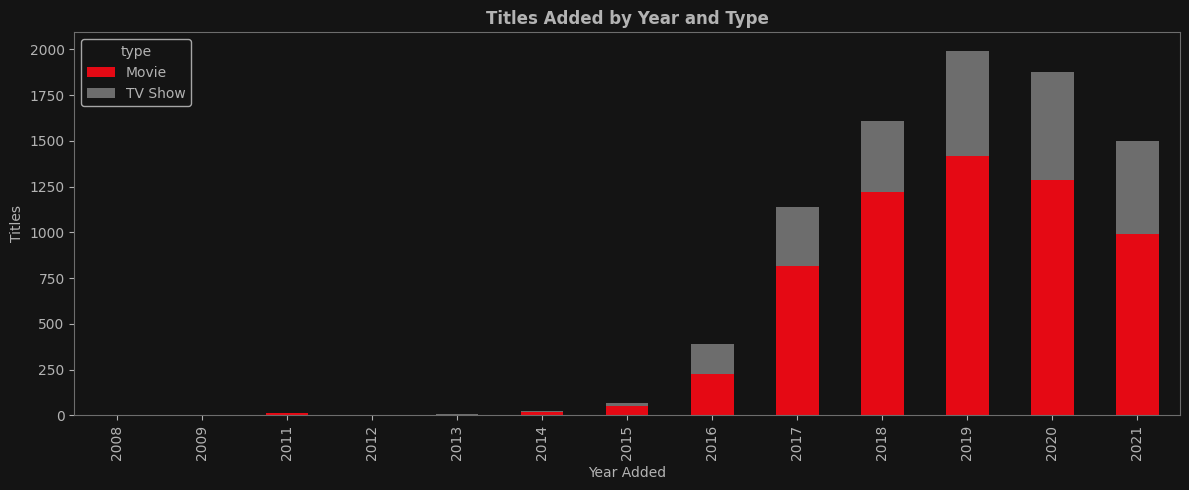

In [65]:
# Stacked distribution of type over year_added
tmp = df.dropna(subset=["year_added"]).copy()
tmp["year_added"] = tmp["year_added"].astype(int)

pivot = tmp.pivot_table(index="year_added", columns="type", values="show_id", aggfunc="count").fillna(0)

plt.figure(figsize=(12,5))
pivot.plot(kind="bar", stacked=True, color=[NETFLIX_RED, MID_GRAY], figsize=(12,5))
plt.title("Titles Added by Year and Type")
plt.xlabel("Year Added")
plt.ylabel("Titles")
plt.tight_layout()
plt.show()


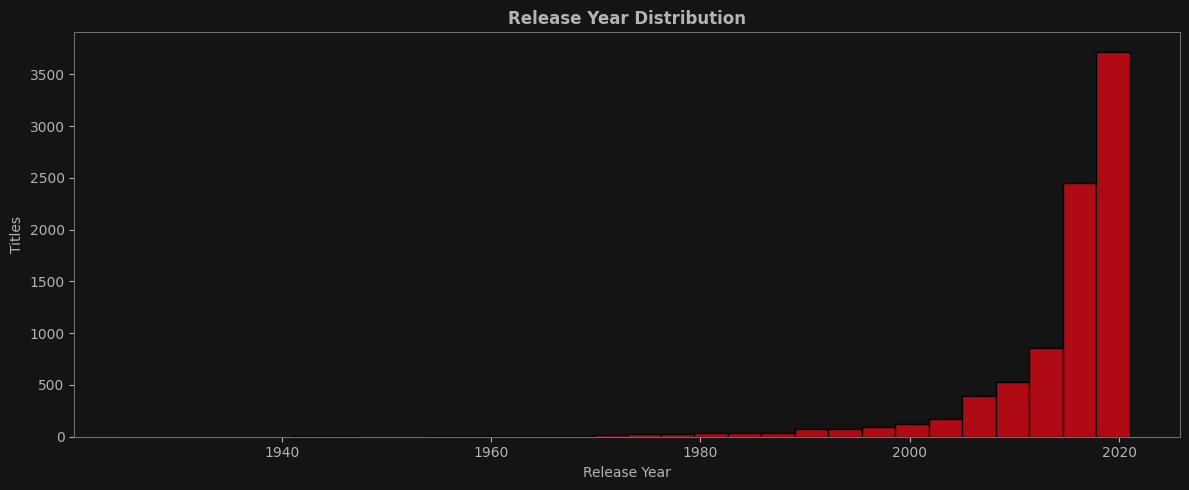

In [66]:
# Release year distribution
plt.figure(figsize=(12,5))
sns.histplot(df["release_year"], bins=30, color=NETFLIX_RED)
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Titles")
plt.tight_layout()
plt.show()


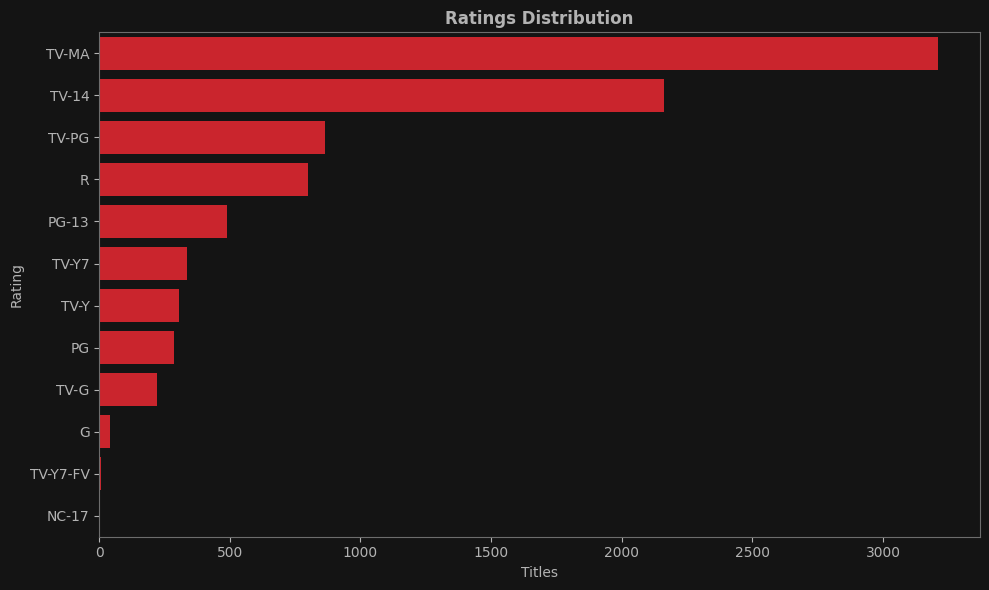

In [67]:
# Rating distribution
plt.figure(figsize=(10,6))
order = df["rating"].value_counts().index
sns.countplot(data=df, y="rating", order=order, color=NETFLIX_RED)
plt.title("Ratings Distribution")
plt.xlabel("Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


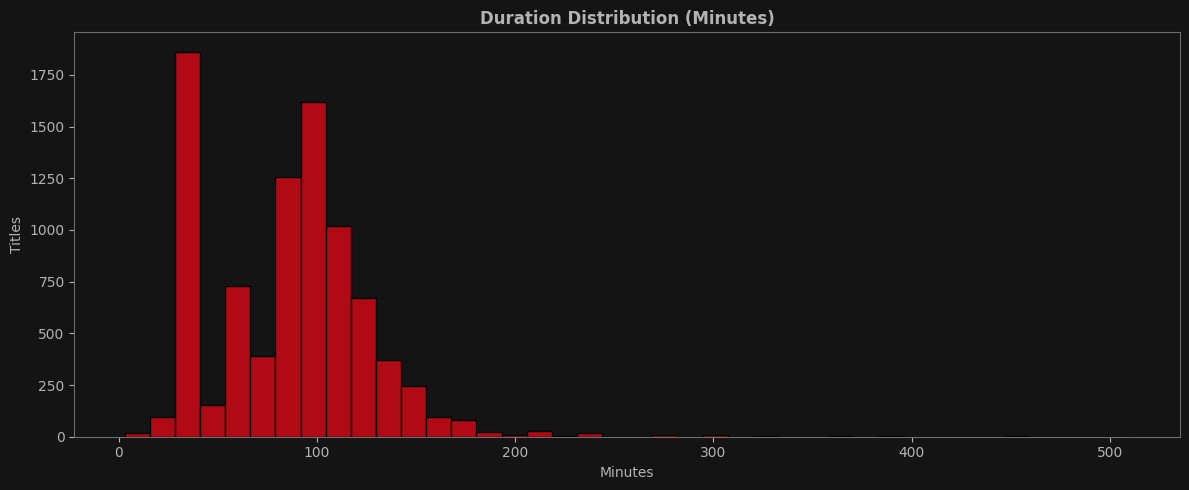

In [68]:
# Duration distribution (minutes)
plt.figure(figsize=(12,5))
sns.histplot(df["duration"].dropna(), bins=40, color=NETFLIX_RED)
plt.title("Duration Distribution (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Titles")
plt.tight_layout()
plt.show()


/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_49741/3828441232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="duration", palette=[NETFLIX_RED, MID_GRAY])


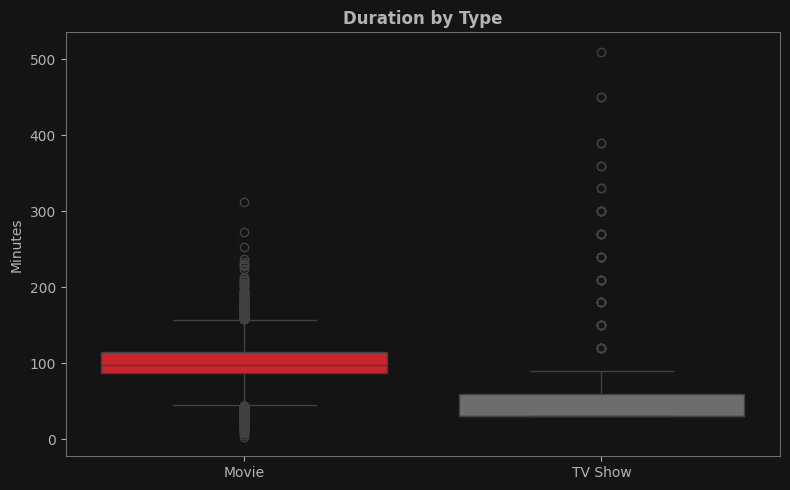

In [69]:
# Duration by type (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="type", y="duration", palette=[NETFLIX_RED, MID_GRAY])
plt.title("Duration by Type")
plt.xlabel("")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()


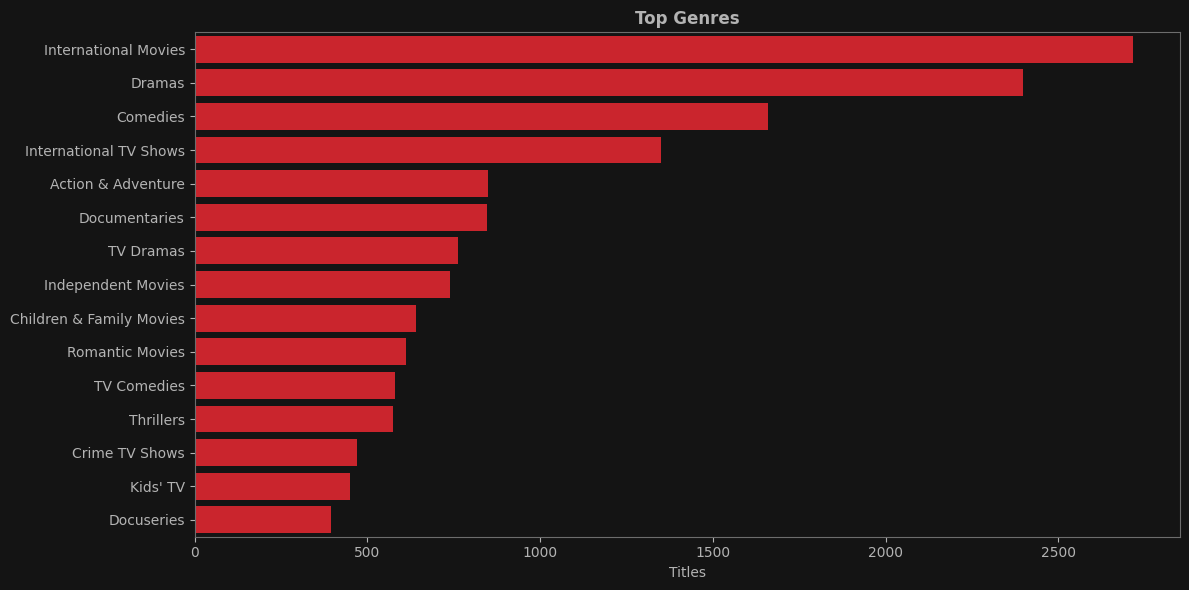

In [70]:
# Genre analysis (top 15)
from collections import Counter

all_genres = ", ".join(df["listed_in"].fillna("")).split(", ")
genre_counts = Counter([g for g in all_genres if g])

genre_df = pd.DataFrame(genre_counts.items(), columns=["genre","count"]).sort_values("count", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x="count", y="genre", color=NETFLIX_RED)
plt.title("Top Genres")
plt.xlabel("Titles")
plt.ylabel("")
plt.tight_layout()
plt.show()


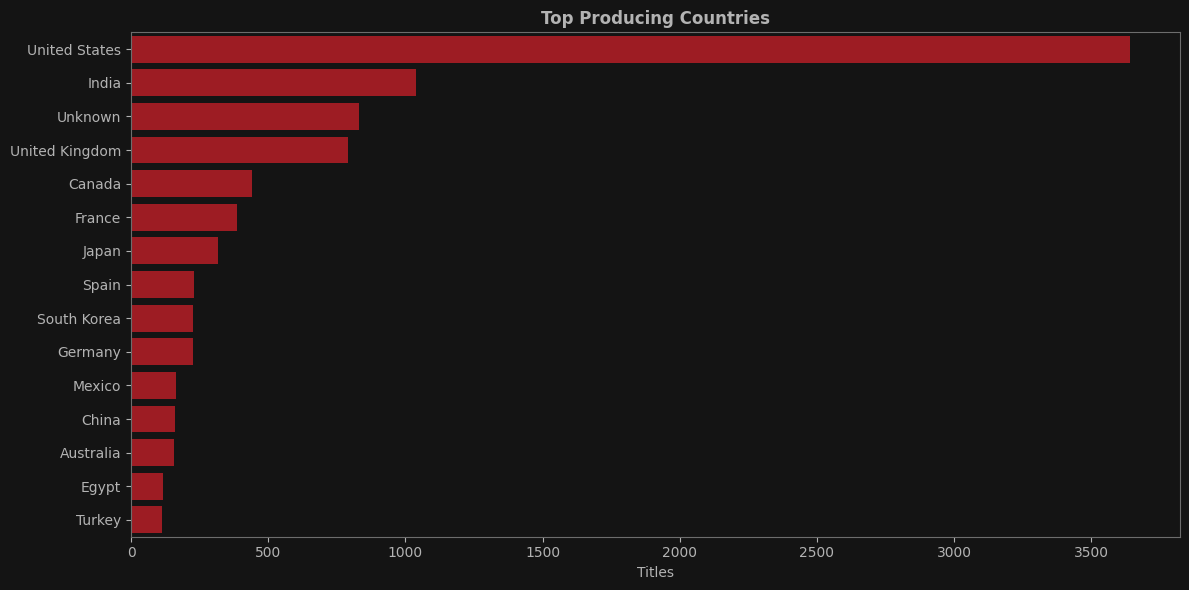

In [71]:
# Country analysis (top 15)
from collections import Counter

all_countries = ", ".join(df["country"].fillna("")).split(", ")
country_counts = Counter([c for c in all_countries if c])

country_df = pd.DataFrame(country_counts.items(), columns=["country","count"]).sort_values("count", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=country_df, x="count", y="country", color=RED_2)
plt.title("Top Producing Countries")
plt.xlabel("Titles")
plt.ylabel("")
plt.tight_layout()
plt.show()


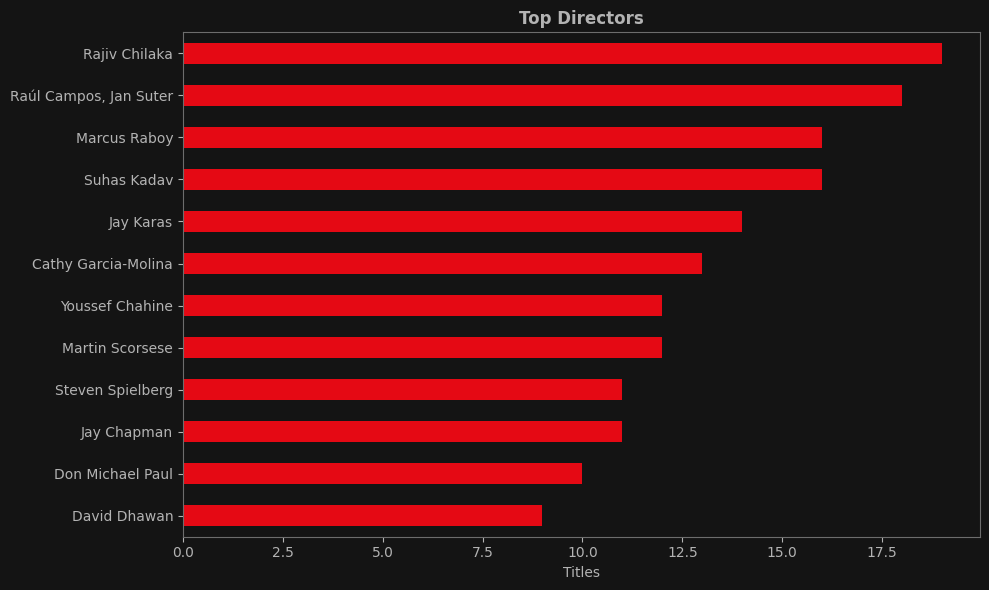

In [72]:
# Top directors (excluding Unknown)
dir_series = df["director"].fillna("Unknown")
top_dir = dir_series[dir_series != "Unknown"].value_counts().head(12)

plt.figure(figsize=(10,6))
top_dir.sort_values().plot(kind="barh", color=NETFLIX_RED)
plt.title("Top Directors")
plt.xlabel("Titles")
plt.ylabel("")
plt.tight_layout()
plt.show()


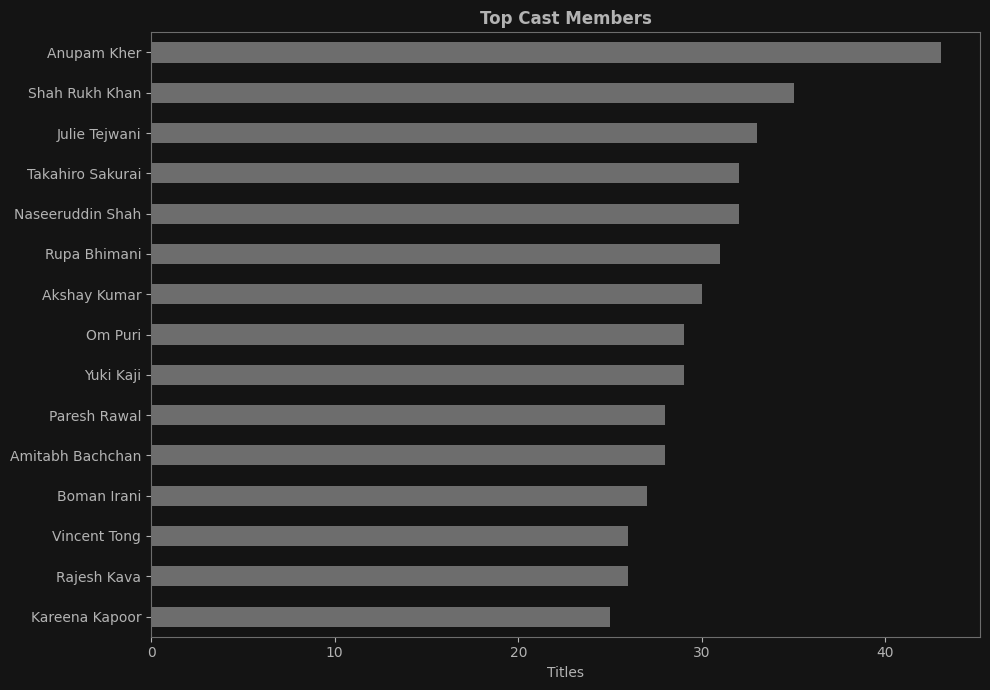

In [73]:
# Top cast members (split the cast list)
cast = df["cast"].fillna("Unknown")
cast = cast[cast != "Unknown"].str.split(", ").explode()
top_cast = cast.value_counts().head(15)

plt.figure(figsize=(10,7))
top_cast.sort_values().plot(kind="barh", color=MID_GRAY)
plt.title("Top Cast Members")
plt.xlabel("Titles")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [ ]:


# Process genres
from collections import Counter
all_genres = ', '.join(df['listed_in']).split(', ')
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df['Genre'][:15], y=genre_df['Count'][:15], palette=sns.color_palette("Reds", 15))

plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.title("Top 15 Most Common Genres on Netflix", fontsize=14, color='black')
plt.xlabel("Genre", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.gca().set_facecolor('white')
plt.show()

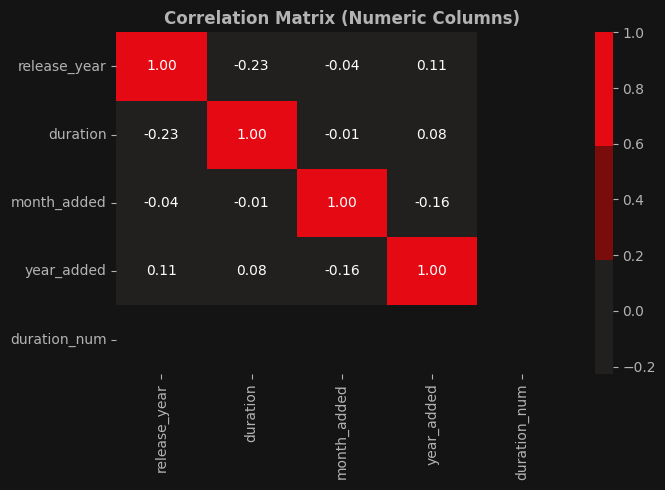

In [45]:
# Correlations among numeric columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap=sns.color_palette([DARK_GRAY, RED_3, NETFLIX_RED], as_cmap=True),
            annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix (Numeric Columns)")
plt.tight_layout()
plt.show()


### Notes
- This dataset is content metadata, so EDA focuses on catalog composition and trends.
- User behavior is not present here, so any user level metrics are simulated later in the modeling notebook.
